# Tester_branch에서 성능 확인 진행

In [51]:
# 라이브러리 및 데이터 불러오기

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt

wine = load_wine()

''' 데이터 코드를 작성해주세요 '''

# feature로 사용할 데이터에서는 'target' 컬럼을 drop합니다.
# target은 'target' 컬럼만을 대상으로 합니다.
# X, y 데이터를 test size는 0.2, random_state 값은 42로 하여 train 데이터와 test 데이터로 분할합니다.
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

# train-test 분할 (test size 0.2, random_state 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# DT 모델링 성능

Best Hyper-parameters:{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.9224137931034484


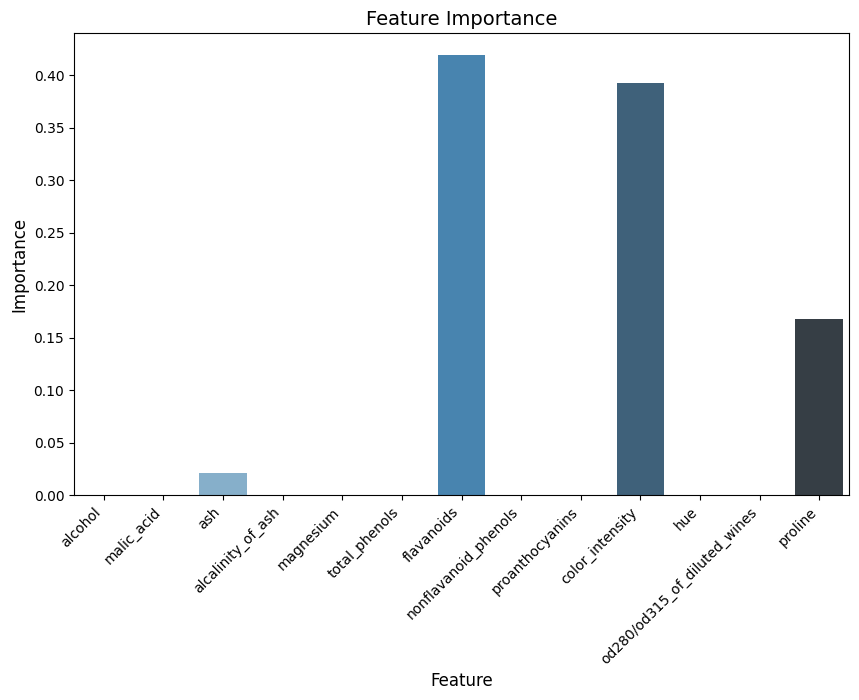

In [88]:
''' 코드를 작성해주세요 '''
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Decision Tree 모델 생성
dt_clf = DecisionTreeClassifier(random_state=42)

# 2. 하이퍼파라미터 그리드 설정
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 3. GridSearchCV 수행 (cv=5, scoring='accuracy')
grid_cv = GridSearchCV(dt_clf, param_grid=params, cv=5, scoring='accuracy')
grid_cv.fit(X_train, y_train)

# 4. 최적 파라미터 및 최고 정확도 출력
print(f"Best Hyper-parameters:{grid_cv.best_params_}")
print(f"Best score: {grid_cv.best_score_}")

# 5. 최적 모델로 테스트 세트 평가
best_dt = grid_cv.best_estimator_
test_acc = best_dt.score(X_test, y_test)

# 6. Feature Importance 시각화
plt.figure(figsize=(10, 6))
importance = pd.Series(best_dt.feature_importances_, index=X_train.columns)
sns.barplot(x=importance.index, y=importance.values, palette='Blues_d')

plt.title('Feature Importance', fontsize=14)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.show()

<img src="../참고이미지/Git/DT_Modeling.png" width="80%">

# XGB 모델링 성능

Best parameters:{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best accuracy: 0.9576354679802955


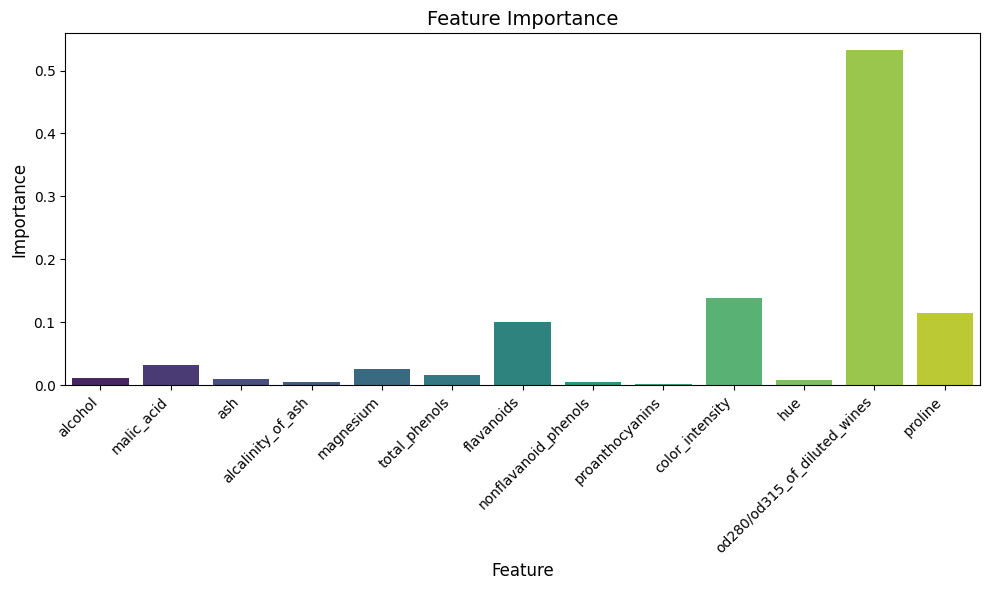

In [86]:
''' 코드를 작성해주세요 '''
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# 1. XGBoost 모델 생성 (random_state 고정)
xgb = XGBClassifier(random_state=42, eval_metric='logloss')

# 2. 하이퍼파라미터 그리드 설정
params = {
    'max_depth': [3, 5, 7, 9, 15],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200, 300]
}

# 3. GridSearchCV 수행 (cv=5, scoring='accuracy')
grid_cv = GridSearchCV(xgb, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
grid_cv.fit(X_train, y_train)

# 4. 최적 파라미터 및 최고 정확도 출력
print(f"Best parameters:{grid_cv.best_params_}")
print(f"Best accuracy: {grid_cv.best_score_}")

# 5. 최적 모델로 테스트 세트 평가
best_xgb = grid_cv.best_estimator_
test_acc = best_xgb.score(X_test, y_test)

# 6. Feature Importance 시각화
plt.figure(figsize=(10, 6))
importance = pd.Series(best_xgb.feature_importances_, index=X_train.columns)
sns.barplot(x=importance.index, y=importance.values, palette='viridis')

plt.title('Feature Importance', fontsize=14)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

<img src="../참고이미지/Git/XGB_Modeling.png" width="80%">`

# 성능 비교 시각화

====================== DT 성능확인 =========================
DT accuracy : 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

====================== XGB 성능확인 =========================
XGB accuracy : 0.9722222222222222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



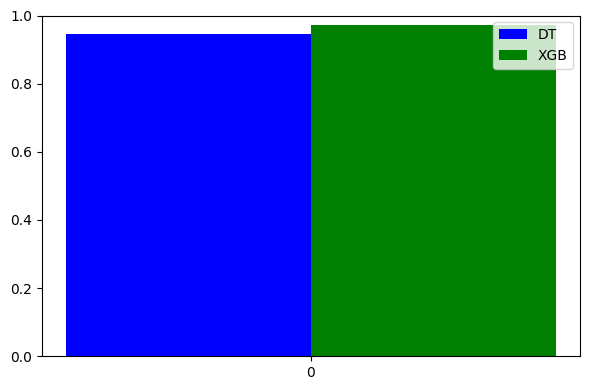

In [47]:
''' 코드를 작성해주세요 '''
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

print("====================== DT 성능확인 =========================")
print("DT accuracy :", best_dt.score(X_test, y_test))
print(classification_report(y_test, best_dt.predict(X_test), digits=2))

print("====================== XGB 성능확인 =========================")
print("XGB accuracy :", best_xgb.score(X_test, y_test))
print(classification_report(y_test, best_xgb.predict(X_test), digits=2))

# 성능 비교 시각화 (수정 버전)
plt.figure(figsize=(6, 4))
models = ['DT', 'XGB']
accuracies = [best_dt.score(X_test, y_test), best_xgb.score(X_test, y_test)]

# 막대 그래프 생성
bars = plt.bar(range(len(models)), accuracies, 
               width=1,  # 막대 너비 조정 (1에 가까울수록 붙음)
               color=['blue', 'green'])

# x축 설정 (중앙에 0 하나만 표시)
plt.xticks([0.5], ['0'])  # x축 중간 위치(0.5)에 '0' 표시

plt.ylim(0.0, 1.0)

# 범례 추가 (모델 이름 표시)
plt.legend(bars, models, loc='upper right')

plt.tight_layout()
plt.show()

<img src="../참고이미지/Git/성능_비교_시각화.png" width="40%">